In [1]:
%matplotlib ipympl

In [2]:
# initialization
from rayoptics.environment import *

In [3]:
root_pth = Path(rayoptics.__file__).resolve().parent

In [4]:
app = AppManager(None)

# Create a new model

In [5]:
app.model = open_model("/Users/Mike/Developer/PyProjects/ray-optics/src/rayoptics/codev/tests/threemir.seq")
opm = app.model
sm = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model

In [6]:
opm.update_model()

FigureCanvasNbAgg()

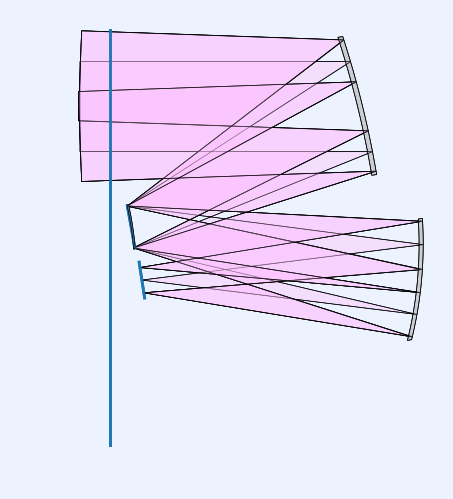

In [7]:
layout_plt = plt.figure(FigureClass=LensLayoutFigure, opt_model=opm).plot()
app.add_view(layout_plt, ModelInfo(opm, layout_plt.refresh))

In [8]:
sm.list_model()

0 Surface(lbl='Obj', profile=Spherical(c=0.0))
     Gap(t=100000000000.0, medium=Air)
1 Surface(profile=Spherical(c=0.0))
     Gap(t=300.0, medium=Air)
2 Surface(profile=Conic(c=-0.0009442965419001326, cc=-1.314566))
     Gap(t=-276.006853, medium=Air)
3 Surface(profile=Spherical(c=0.0))
     Gap(t=-0.981318, medium=Air)
4 Surface(profile=Conic(c=-0.0030858006881335533, cc=0.889123))
     Gap(t=319.16056, medium=Air)
5 Surface(profile=Profile(EvenPolynomial: c=-0.002202812215809689, cc=0.226106)
     Gap(t=-306.21311000000003, medium=Air)
6 Surface(lbl='Img', profile=Spherical(c=0.0))


In [9]:
sm.list_decenters()

0 Gap(t=100000000000.0, medium=Air)
1 Gap(t=300.0, medium=Air)
2 Gap(t=-276.006853, medium=Air)
  'DAR': Decenter: array([ 0.      , 48.695345,  0.      ]), Tilt: array([8.438645, 0.      , 0.      ])
3 Gap(t=-0.981318, medium=Air)
  'DAR': Decenter: array([ 0.      , 11.444717,  0.      ]), Tilt: array([10.2199,  0.    ,  0.    ])
4 Gap(t=319.16056, medium=Air)
  'DAR': Decenter: array([ 0.      , 17.561821,  0.      ]), Tilt: array([9.66158, 0.     , 0.     ])
5 Gap(t=-306.21311000000003, medium=Air)
  'DAR': Decenter: array([ 0.      , 67.500535,  0.      ]), Tilt: array([9.514418, 0.      , 0.      ])
6 'LOCAL': Decenter: array([  0.      , -47.681342,   0.      ]), Tilt: array([8.716957, 0.      , 0.      ])


In [10]:
s2=sm.ifcs[2]

In [11]:
print(s2)

Surface(profile=Conic(c=-0.0009442965419001326, cc=-1.314566))


In [12]:
s2.decenter

'DAR': Decenter: array([ 0.      , 48.695345,  0.      ]), Tilt: array([8.438645, 0.      , 0.      ])

In [13]:
s2.decenter.dec[1]

48.695345

In [14]:
s2.clear_apertures[0].y_half_width

78.538674

In [15]:
sm.lcl_tfrms

[(array([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]), array([0.e+00, 0.e+00, 1.e+11])),
 (array([[ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.98917358, -0.14675024],
         [-0.        ,  0.14675024,  0.98917358]]),
  array([  0.      ,  48.695345, 300.      ])),
 (array([[ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.99951678, -0.03108376],
         [ 0.        ,  0.03108376,  0.99951678]]),
  array([   0.        ,    3.65673555, -278.48522488])),
 (array([[ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.99995252,  0.00974437],
         [ 0.        , -0.00974437,  0.99995252]]),
  array([0.        , 6.19416217, 0.11958827])),
 (array([[ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.9999967 ,  0.00256846],
         [ 0.        , -0.00256846,  0.9999967 ]]),
  array([  0.        ,  -4.33380275, 323.0147928 ])),
 (array([[ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.9999

In [16]:
sm.gbl_tfrms

[(array([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]), array([ 0.e+00,  0.e+00, -1.e+11])),
 (array([[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]), array([0., 0., 0.])),
 (array([[ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.98917358,  0.14675024],
         [ 0.        , -0.14675024,  0.98917358]]),
  array([  0.      ,  48.695345, 300.      ])),
 (array([[ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.98413404,  0.17742656],
         [ 0.        , -0.17742656,  0.98413404]]),
  array([ 0.      , 11.444717, 23.993147])),
 (array([[ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.98581623,  0.16782837],
         [ 0.        , -0.16782837,  0.98581623]]),
  array([ 0.      , 17.561821, 23.011829])),
 (array([[ 1.        ,  0.        ,  0.        ],
         [ 0.        ,  0.98624404,  0.16529579],
         [ 0.        , -0.16529579,  0.98624404]]),
  array([  0.      ,  67.500535, 342.172389])),
 (arr

In [17]:
for i,trfm in enumerate(sm.gbl_tfrms):
    print("{}: {:12.7g} {:12.7g} {:12.7g}".format(i, trfm[1][0], trfm[1][1], trfm[1][2]))

0:            0            0       -1e+11
1:            0            0            0
2:            0     48.69535          300
3:            0     11.44472     23.99315
4:            0     17.56182     23.01183
5:            0     67.50053     342.1724
6:            0    -47.68134     35.95928


In [18]:
for i,ifc in enumerate(sm.ifcs):
    if ifc.decenter is not None:
        dec = ifc.decenter.dec
        print("{}: {:12.7g} {:12.7g} {:12.7g}".format(i, dec[0], dec[1], dec[2]))

2:            0     48.69535            0
3:            0     11.44472            0
4:            0     17.56182            0
5:            0     67.50053            0
6:            0    -47.68134            0


In [19]:
pt0 = np.array([0., 10., 0.])
dir0 = np.array([0., 0., 1.])
wvl = sm.central_wavelength()
cr0 = rt.trace(sm, pt0, dir0, wvl)
list_ray(cr0[0])

            X            Y            Z           L            M            N               Len
  0:      0.00000     10.00000            0     0.000000     0.000000     1.000000        1e+11
  1:      0.00000     10.00000            0     0.000000     0.000000     1.000000       305.01
  2:      0.00000    -39.01227     -0.71851     0.000000    -0.073586    -0.997289       276.56
  3:      0.00000    -63.05024            0     0.000000    -0.042551    -0.999094       8.2271
  4:      0.00000    -69.67243      -7.6607     0.000000    -0.475052     0.879958       313.21
  5:      0.00000   -214.27020      -54.514     0.000000     0.493900    -0.869519       306.52
  6:      0.00000      0.10134            0     0.000000     0.481750    -0.876308            0


In [20]:
sm.stop_surface

3

In [21]:
s5=sm.ifcs[5]

In [22]:
fld, wvl, foc = osp.lookup_fld_wvl_focus(1)

In [23]:
oa_ray = trace_base(opm, [0., 0.], fld, wvl)

In [24]:
list_ray(oa_ray)

            X            Y            Z           L            M            N               Len
  0:      0.00000      0.00000            0     0.000000     0.000000     1.000000        1e+11
  1:      0.00000    144.92753            0     0.000000     0.000000     1.000000       281.15
  2:      0.00000     97.95712      -4.5275     0.000000    -0.325473    -0.945551       289.73
  3:      0.00000      0.00000  -2.5244e-29     0.000000    -0.295924    -0.955211  -7.4781e-08
  4:      0.00000     -6.19503    -0.059224     0.000000    -0.341403     0.939917       327.93
  5:      0.00000   -113.85435      -14.558     0.000000     0.163748    -0.986502       310.68
  6:      0.00000      0.00000            0     0.000000     0.150002    -0.988686            0


In [25]:
list_ray(oa_ray, tfrms=sm.gbl_tfrms)

            X            Y            Z           L            M            N               Len
  0:      0.00000      0.00000       -1e+11     0.000000     0.000000     1.000000        1e+11
  1:      0.00000    144.92753            0     0.000000     0.000000     1.000000       281.15
  2:      0.00000    144.92753       281.15     0.000000    -0.460709    -0.887551       289.73
  3:      0.00000     11.44472       23.993     0.000000    -0.460709    -0.887551  -7.4781e-08
  4:      0.00000     11.44472       23.993     0.000000    -0.178816     0.983882       327.93
  5:      0.00000    -47.19394       346.63     0.000000    -0.001569    -0.999999       310.68
  6:      0.00000    -47.68134       35.959     0.000000    -0.001569    -0.999999            0


In [26]:
s5.clear_apertures[0].bounding_box()

(array([ -66.581268, -177.807751]), array([ 66.581268, -46.900709]))

In [27]:
vars(s5.clear_apertures[0])

{'x_offset': 0.0,
 'y_offset': -112.35423,
 'rotation': 0.0,
 'x_half_width': 66.581268,
 'y_half_width': 65.453521}

In [28]:
vars(s5.decenter)

{'dtype': <DecenterType.DAR: 2>,
 'dec': array([ 0.      , 67.500535,  0.      ]),
 'euler': array([9.514418, 0.      , 0.      ]),
 'rot_pt': array([0., 0., 0.]),
 'rot_mat': array([[ 1.        ,  0.        , -0.        ],
        [ 0.        ,  0.98624404,  0.16529579],
        [ 0.        , -0.16529579,  0.98624404]])}

In [29]:
si=sm.ifcs[-1]

In [30]:
vars(si.decenter)

{'dtype': <DecenterType.LOCAL: 0>,
 'dec': array([  0.      , -47.681342,   0.      ]),
 'euler': array([8.716957, 0.      , 0.      ]),
 'rot_pt': array([0., 0., 0.]),
 'rot_mat': array([[ 1.        ,  0.        , -0.        ],
        [ 0.        ,  0.98844908,  0.15155336],
        [ 0.        , -0.15155336,  0.98844908]])}